# Restaurant Sales Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "/content/drive/MyDrive/COLAB YUZAR/restaurant_sales_data.csv"
df = pd.read_csv(file)

df

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,NaN,NaN,4.0,4.0,2023-12-23,Cash
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet


# Business Understanding

## Business Objective

Kita memiliki dataset transaksi restoran dari tahun 2022-2023. Terdapat order id, customer id, kategori menu, item, harga, jumlah, total, tanggal, dan metode bayar. Tujuannya adalah mencari tahu pola penjualan agar dapat memberikan masukan ke restoran, seperti:

- Menu apa yang paling laris?
- Kapan waktu ramai pengunjung?
- Metode pembayaran apa yang paling sering dipakai?
- Apakah ada hubungan antara harga dan jumlah yang dibeli?

Dari hasil analisis, restoran dapat mengatur stok lebih baik, bikin promo pas waktu sepi, dan meningkatin pelayanan.

## Assess Situation

Saat ini, restoran memiliki data transaksi yang cukup lengkap namun terdapat beberapa masalah:

- Terdapat kolom yang kosong (missing values), terutama di kolom Item, Price, Quantity, Order Total, dan Payment Method.

- Format tanggal yang sudah bagus, tetapi perlu dipisah jadi bulan/tahun agar mudah dianalisis.

Banyaknya missing values dapat mengurangi keandalan hasil jika tidak ditangani dengan baik.

## Analytic Goals

- Mengidentifikasi kategori dan item dengan penjualan tertinggi dan kontribusi pendapatan terbesar.
- Mengetahui pola penjualan harian, bulanan, dan tahunan untuk menentukan periode sibuk dan sepi.
- Menganalisis metode pembayaran yang paling sering digunakan dan kaitannya dengan nilai transaksi.
- Melihat hubungan antara harga, jumlah pesanan, dan total penjualan untuk menentukan strategi harga.
- Menemukan transaksi tidak wajar (misal, missing values atau outlier) untuk perbaikan data.

## Project Plan

- Data Understanding dan Preparation
- Eksplorasi Data dan Visualisasi
- Analisis dan Kesimpulan

# Data Understanding

## Informasi Lanjutan

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        17534 non-null  object 
 1   Customer ID     17534 non-null  object 
 2   Category        17534 non-null  object 
 3   Item            15776 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        17104 non-null  float64
 6   Order Total     17104 non-null  float64
 7   Order Date      17534 non-null  object 
 8   Payment Method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB


1. Order ID: Jumlah Baris: 17534 Tipe Data: object Deskripsi: ID Pesanan
2. Customer ID: Jumlah Baris: 17534 Tipe Data: object Deskripsi: ID Pembeli
3. Category: Jumlah Baris: 17534 Tipe Data: object Deskripsi: Kategori
4. Item: Jumlah Baris: 15776 Tipe Data: object Deskripsi: Barang
5. Price: Jumlah Baris: 16658 Tipe Data: float64 Deskripsi: Harga
6. Quantity: Jumlah Baris: 17104 Tipe Data: float64 Deskripsi : Jumlah
7. Order Total: Jumlah Baris: 17104 Tipe Data: float64 Deskripsi : Jumlah Pesanan
8. Order Date: Jumlah Baris: 17534 Tipe Data: object Deskripsi : Tanggal Pesanan
9. Payment Method: Jumlah Baris: 16452 Tipe Data: object Deskripsi : Metode Pembayaran

## Statistik Deskriptif

In [4]:
df.describe(include='all')

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
count,17534,17534,17534,15776,16658.000000,17104.000000,17104.000000,17534,16452
unique,17534,100,5,26,NaN,NaN,NaN,730,3
top,ORD_680707,CUST_066,Main Dishes,Pasta Alfredo,NaN,NaN,NaN,2023-11-25,Credit Card
freq,1,207,3551,998,NaN,NaN,NaN,42,5504
mean,NaN,NaN,NaN,NaN,6.586325,3.014149,19.914494,NaN,NaN
std,NaN,NaN,NaN,NaN,4.834652,1.414598,18.732549,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,3.000000,2.000000,7.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,3.000000,15.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,7.000000,4.000000,25.000000,NaN,NaN


1. Count (Kelengkapan Data)
Berdasarkan data, total baris transaksi adalah 155. Maka dapat disimpulkan:
* Item hilang 1758 data (17534 - 15776)
* Price hilang 876 data (17534 - 16658)
* Quantity hilang 430 data (17534 - 17104)
* Order Total hilang 430 data (17534 - 17104)
* Payment Method hilang 1082 data (17534 - 16452)

Kesimpulan: Kolom Item, Price, Quantity, Order Total, dan Payment Method mengandung missing values, sementara kolom lainnya sudah lengkap (17534 data)



---



2. Mean vs Median (Distribusi Data)

* Kolom Price
  * Mean = 6.59
  * Median = 5.0 - Nilai rata-rata sedikit lebih besar dari median

  Perbedaan yang signifikan antara mean dan median menunjukkan bahwa distribusi harga cenderung condong ke kanan (right-skewed), berarti ada beberapa item dengan harga yang jauh lebih tinggi (outlier) yang menarik nilai rata-rata ke atas, sedangkan sebagian besar item memiliki harga yang lebih rendah.

* Kolom Quantity
 * Mean = 3,01
 * Median = 3,0 - Rata-rata pembelian hampir sama dengan median

   Ini mengindikasikan bahwa sebagian besar transaksi melibatkan jumlah barang yang serupa, dan tidak ada nilai ekstrem (outlier) yang signifikan mempengaruhi rata-rata.

* Kolom Order Total
  * Mean = 19,91
  * Median = 15,0 - Perbedaan yang tidak terlalu jauh antara mean dan median
  
  berarti ada beberapa transaksi dengan nilai total pesanan yang sangat tinggi (outlier), yang secara signifikan menarik nilai rata-rata ke atas, sementara mayoritas transaksi memiliki nilai total yang jauh lebih rendah.

Kesimpulan: Secara keseluruhan, data bersifat right-skewed (condong ke kanan), di mana terdapat nilai-nilai ekstrem tinggi yang memengaruhi nilai rata-rata di semua variabel utama.



---



3. Min dan Max (Validasi Logika)

* Price
  * Min = 1,0
  * Max = 20,0

* Quantity
  * Min = 1,0
  * Max = 5,0

* Order Total
  * Min = 1,0
  * Max = 100,0

Kesimpulan:
* Price: Rentang harga dari 1.0 hingga 20.0 Dolar terlihat wajar untuk item menu restoran.

* Quantity: Jumlah pesanan per transaksi dari 1.0 hingga 5.0 unit       menunjukkan pola pembelian normal, tanpa indikasi pesanan massal yang tidak biasa.

* Order Total: Total pesanan dari 1.0 hingga 100.0 Dolar mencakup pembelian individual kecil hingga pesanan kelompok yang lebih besar, yang merupakan rentang yang logis untuk transaksi restoran.



---



4. Standar Deviasi (std) - Variabilitas Data

* Price
  * Mean = 6.59
  * Std = 4.834

* Quantity
  * Mean = 3,01
  * Std = 1,414

* Order Total
  * Mean = 19,91
  * Std = 18,732

Kesimpulan:

* Pada kolom Price, nilai standar deviasi yang cukup tinggi relatif terhadap rata-ratanya menunjukkan variasi harga item yang dijual cukup beragam.

* Pada kolom Quantity, nilai standar deviasi yang relatif rendah menunjukkan bahwa jumlah item yang dibeli dalam setiap transaksi tidak terlalu bervariasi; sebagian besar pesanan memiliki jumlah item yang serupa.

* Pada kolom Order Total, nilai standar deviasi yang tinggi menunjukkan variasi yang signifikan dalam nilai total pesanan. Ini mengindikasikan ada perbedaan besar antara total pesanan terendah dan tertinggi, dengan beberapa transaksi yang jauh lebih besar dari rata-rata.

# Verifikasi Kualitas Data

## Cek Tipe Data

Pada bagian ini, saya akan mengecek tipe data dari setiap kolom apakah sudah sesuai atau tidak. Agar insight serta visualisasi yang akan dibuat menjadi akurat. Dapat dilihat dibawah ini, kolom **Order Date** dengan tipe data "object", seharusnya kolom ini bertipe data "date" bukan "object". Selain kolom kolom tersebut, sudah sesuai.

In [5]:
df.dtypes

,0
Order ID,object
Customer ID,object
Category,object
Item,object
Price,float64
Quantity,float64
Order Total,float64
Order Date,object
Payment Method,object


## Inconsistent Values

Pada bagian ini, saya perlu mengecek kekonsistenan data, agar data tidak terduplikat dengan baris yang sebenarnya sama akan tetapi bisa terduplikat karena penulisannya tidak konsisten.

1. Category

In [6]:
print(df['Category'].unique())

['Side Dishes' 'Main Dishes' 'Drinks' 'Desserts' 'Starters']


Untuk Kolom Category, dapat dilihat diatas bahwa data nya sudah konsisten.

2. Item

In [7]:
print(df['Item'].unique())

['Side Salad' 'Mashed Potatoes' 'Grilled Chicken' nan 'Pasta Alfredo'
 'Salmon' 'Garlic Bread' 'Vegetarian Platter' 'Brownie'
 'Sweet Potato Fries' 'Lemonade' 'Orange Juice' 'Chocolate Cake'
 'Coca Cola' 'Grilled Vegetables' 'Cheese Fries' 'Beef Chili'
 'Chicken Melt' 'Fruit Salad' 'French Fries' 'Ice Cream' 'Cheesecake'
 'Iced Tea' 'Water' 'Nachos Grande' 'Onion Rings' 'Steak']


Untuk kolom Item, dapat dilihat diatas bahwa data nya sudah konsisten.

3. Order Date

In [8]:
print(df['Order Date'].unique())

['2023-12-21' '2023-05-19' '2023-09-27' '2022-08-09' '2022-05-15'
 '2022-07-20' '2022-08-19' '2023-02-15' '2023-12-16' '2022-08-07'
 '2023-12-09' '2023-10-30' '2023-04-11' '2023-08-18' '2022-06-08'
 '2022-08-28' '2022-05-01' '2023-09-01' '2022-11-13' '2023-06-08'
 '2023-02-21' '2023-02-01' '2023-05-09' '2023-09-14' '2023-03-18'
 '2023-05-18' '2023-09-05' '2022-02-02' '2023-07-30' '2023-01-31'
 '2023-02-28' '2022-11-19' '2023-05-03' '2023-04-20' '2023-09-18'
 '2022-04-08' '2023-07-29' '2023-10-16' '2022-02-09' '2023-08-17'
 '2022-04-13' '2023-07-21' '2023-12-03' '2023-09-16' '2023-02-11'
 '2023-02-05' '2022-01-16' '2023-11-21' '2022-10-08' '2023-03-01'
 '2023-05-23' '2022-08-11' '2022-08-03' '2022-12-20' '2022-09-12'
 '2022-06-24' '2023-08-04' '2022-03-11' '2023-09-28' '2022-08-12'
 '2023-01-23' '2023-07-08' '2022-12-07' '2023-08-01' '2023-06-30'
 '2022-05-27' '2022-04-07' '2022-10-02' '2023-06-01' '2023-05-24'
 '2023-04-01' '2023-01-19' '2022-08-18' '2022-01-11' '2022-05-13'
 '2022-05-

Untuk kolom Order Date, dapat dilihat diatas bahwa data nya sudah konsisten.

4. Payment Method

In [9]:
print(df['Payment Method'].unique())

['Credit Card' 'Digital Wallet' 'Cash' nan]


Untuk kolom Payment Method, dapat dilihat diatas bahwa data nya sudah konsisten meskipun terdapat data yang kosong.

## Missing Values

Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa kolom:
* Item

Memiliki missing values sekitar 10%, yang dimana ini perlu ditangani atau dihapus.
* Price

Memiliki missing values sekitar 5% yang dimana hal ini perlu ditangani dengan cara mau ditangani atau dihapus.
* Quantity

Memiliki missing values sekitar 2,5% yang dimana hal ini perlu ditangani dengan cara mau ditangani atau dihapus.
* Order Total

Memiliki missing values sekitar 2,5% yang dimana hal ini perlu ditangani dengan cara mau ditangani atau dihapus.
* Payment Method

Memiliki missing values sekitar 6% yang dimana hal ini perlu ditangani dengan cara mau ditangani atau dihapus.

In [10]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Order ID,0.000000
Customer ID,0.000000
Category,0.000000
Item,10.026235
Price,4.996008
Quantity,2.452378
Order Total,2.452378
Order Date,0.000000
Payment Method,6.170868


## Duplicated Values

Pada tahap ini, saya akan mengecek duplikasi pada dataset. Hal ini dilakukan agar dataset memiliki insight dan hasil yang bersih.

dapat dilihat dibawah, bahwa dataset ini tidak memiliki duplikasi, oleh karena itu tidak diperlukan penanganan.

In [12]:
df[df.duplicated()]

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method


## Outliers Values

Pada tahap ini, kita akan melihat nilai ekstrem (outliers) pada kolom yang bertipe data kan numerik. Hal ini dilakukan agar mendapatkan insight yang akurat sehingga dapat memperkuat analisis dan model yang akan kita bangun nantinya.

Dan terlihat kolom
* Price

Dengan presentase 13%
* Quantity

Dengan presentase 0%
* Order Total

Dengan presentase 8%

In [26]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Price,13.180107
Quantity,0.000000
Order Total,8.035816


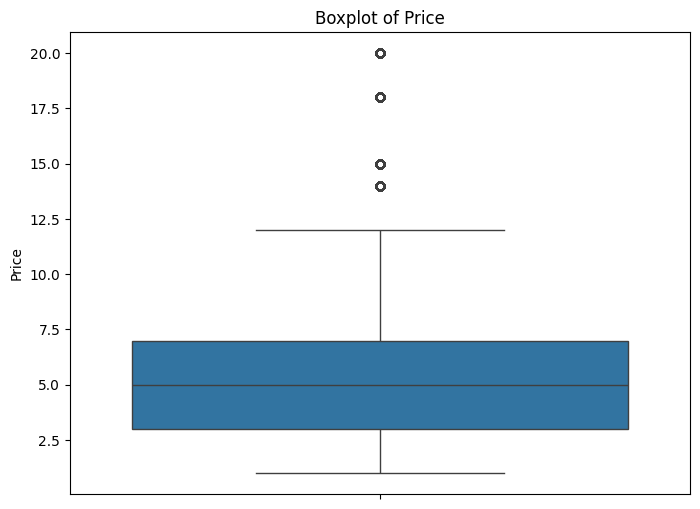

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

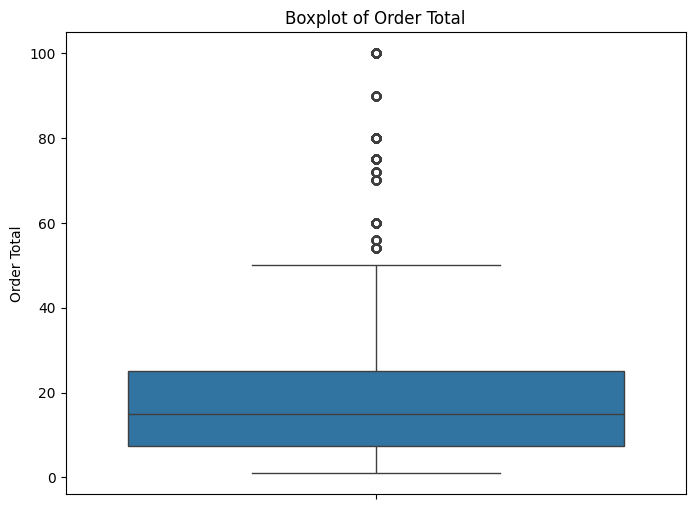

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Order Total'])
plt.title('Boxplot of Order Total')
plt.ylabel('Order Total')
plt.show()

# Eksplorasi Data (EDA)

## Comparasion/Perbandingan

- **Aktivitas**: Membandingkan total penjualan antar kategori menu, antar item menu teratas, dan tren penjualan berdasarkan periode waktu (tahun dan bulan).
- **Tujuan**: Mengidentifikasi menu terlaris, kategori yang paling populer, serta periode waktu (musim, bulan) dengan penjualan tertinggi atau terendah untuk perencanaan stok dan strategi pemasaran.
- **Visualisasi**: Bar Chart (Grafik Batang) untuk kategori, item, tahun dan bulan.

- Kategori 'Main Dishes' memiliki total penjualan tertinggi, jauh melampaui kategori lain, menunjukkan fokus utama dan popularitas menu utama di restoran ini.

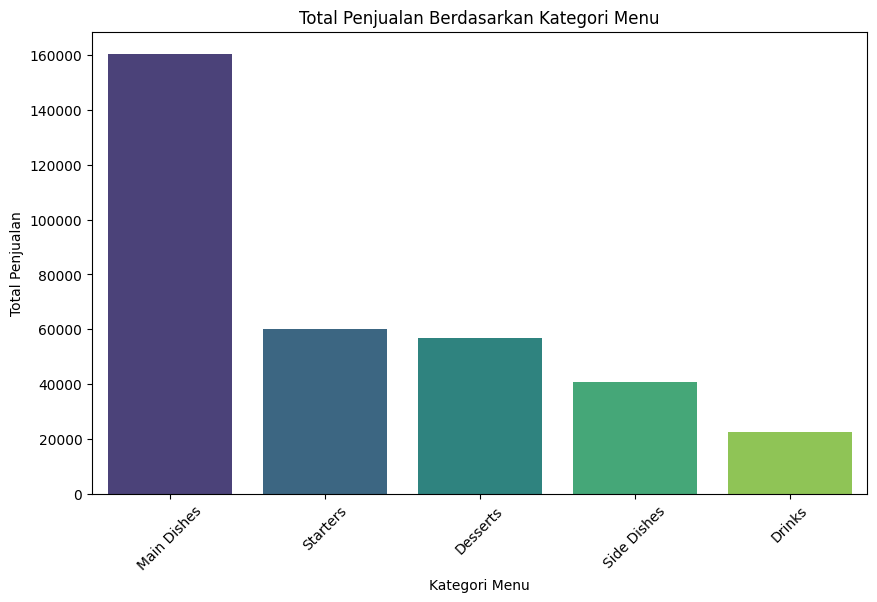

In [28]:
penjualan_per_kategori = df.groupby('Category')['Order Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=penjualan_per_kategori.index, y=penjualan_per_kategori.values, palette='viridis', hue=penjualan_per_kategori.index, legend=False)
plt.title('Total Penjualan Berdasarkan Kategori Menu')
plt.xlabel('Kategori Menu')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

- 'Grilled Chicken' dan 'Pasta Alfredo' adalah dua item individu teratas yang paling laku, menandakan kedua menu ini sangat diminati pelanggan dan berkontribusi signifikan pada pendapatan.

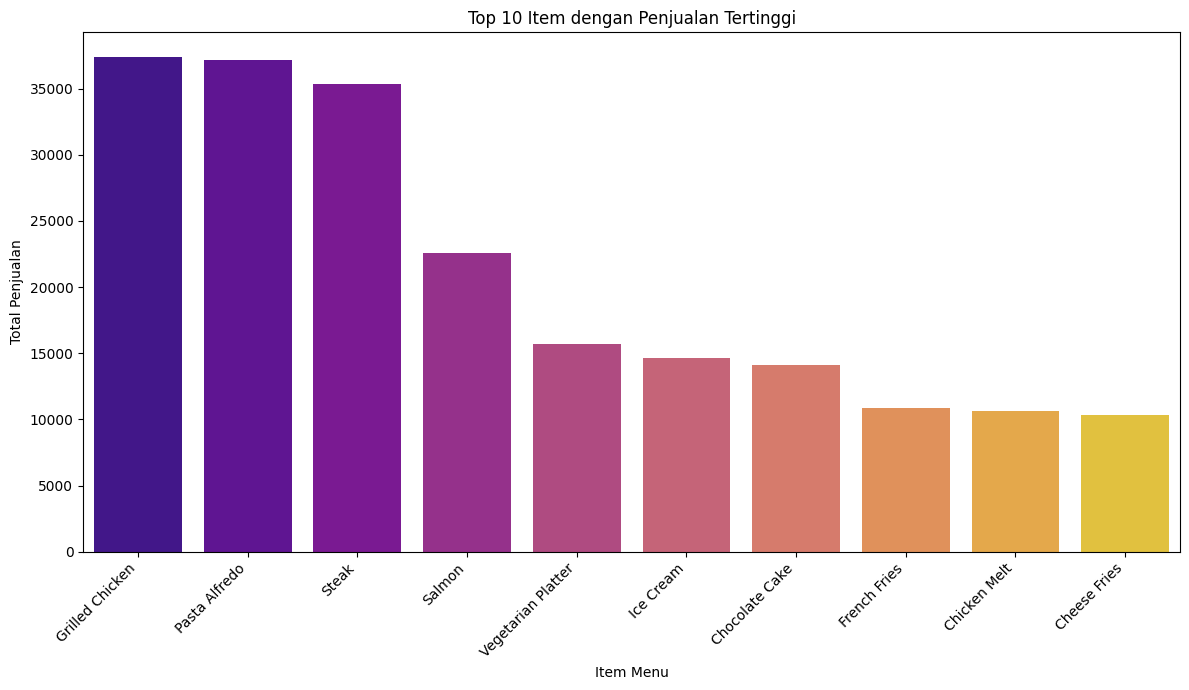

In [62]:
penjualan_per_item = df.groupby('Item')['Order Total'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=penjualan_per_item.index, y=penjualan_per_item.values, palette='plasma', hue=penjualan_per_item.index, legend=False)
plt.title('Top 10 Item dengan Penjualan Tertinggi')
plt.xlabel('Item Menu')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Penjualan di tahun 2022 sedikit lebih tinggi dibandingkan tahun 2023, menunjukkan stabilitas pendapatan dengan sedikit penurunan atau stagnasi pertumbuhan antar tahun.

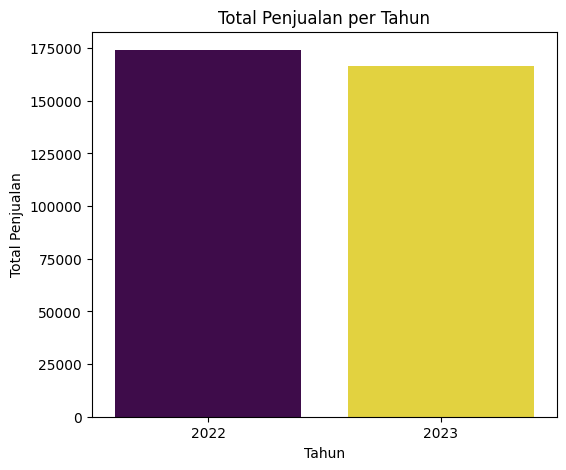

In [63]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

sales_per_year = df.groupby('Year')['Order Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 5))
sns.barplot(x=sales_per_year.index, y=sales_per_year.values, palette='viridis', hue=sales_per_year.index, legend=False)
plt.title('Total Penjualan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.show()

- Penjualan menunjukkan fluktuasi bulanan, dengan bulan Maret dan Agustus sebagai bulan-bulan dengan penjualan yang lebih tinggi, sementara bulan Februari dan November cenderung lebih rendah.

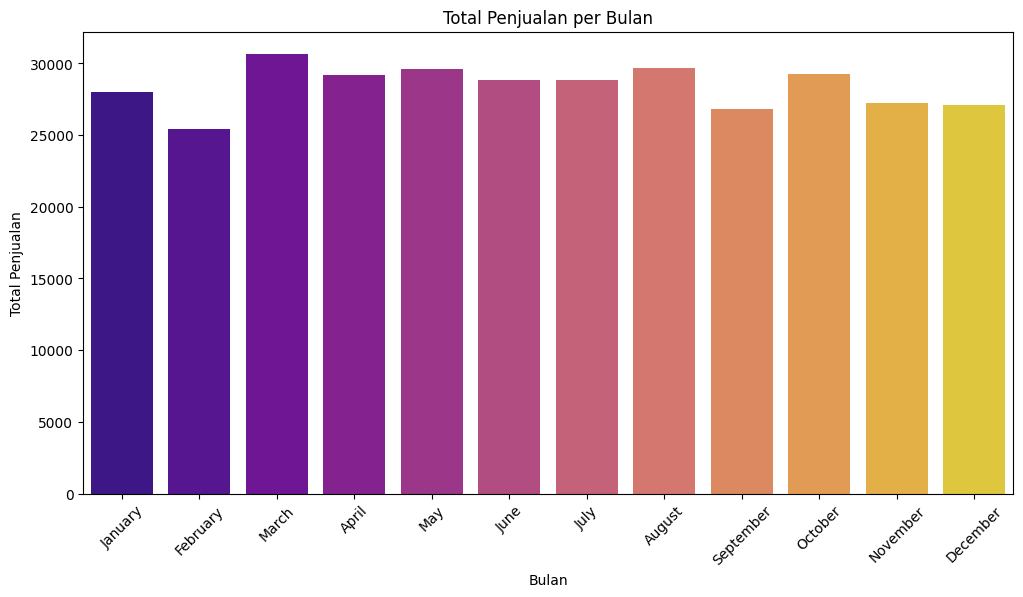

In [64]:
sales_per_month = df.groupby('Month')['Order Total'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_per_month.index, y=sales_per_month.values, palette='plasma', hue=sales_per_month.index, legend=False)
plt.title('Total Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

## Composition/Komposisi

- **Aktivitas**: Menentukan proporsi atau persentase total penjualan yang disumbangkan oleh setiap kategori menu dan setiap metode pembayaran.
- **Tujuan**: Memahami seberapa besar kontribusi masing-masing bagian terhadap total keseluruhan, seperti dominasi kategori menu tertentu atau preferensi metode pembayaran pelanggan.
- **Visualisasi**: Pie Chart (Grafik Lingkaran) untuk kategori menu dan metode pembayaran.

- 'Main Dishes' menyumbang hampir setengah (sekitar 49%) dari total pendapatan, diikuti oleh 'Starters' dan 'Desserts', menegaskan dominasi menu utama dalam struktur pendapatan.

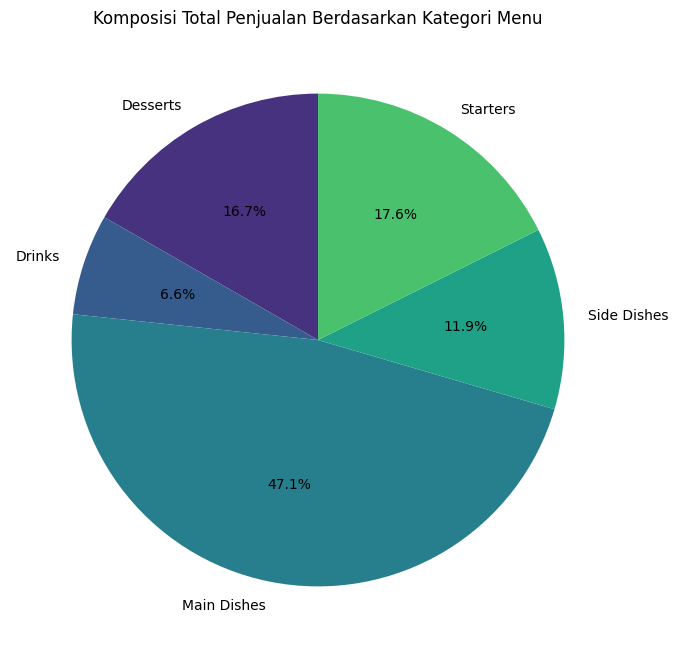

In [43]:
penjualan_per_kategori_komposisi = df.groupby('Category')['Order Total'].sum()

plt.figure(figsize=(8, 8))
plt.pie(penjualan_per_kategori_komposisi, labels=penjualan_per_kategori_komposisi.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Komposisi Total Penjualan Berdasarkan Kategori Menu')
plt.ylabel('')
plt.show()

- Proporsi total penjualan yang berasal dari 'Cash', 'Credit Card', dan 'Digital Wallet' relatif seimbang, menunjukkan tidak ada satu metode pembayaran yang mendominasi secara absolut, memberikan pilihan yang beragam bagi pelanggan.

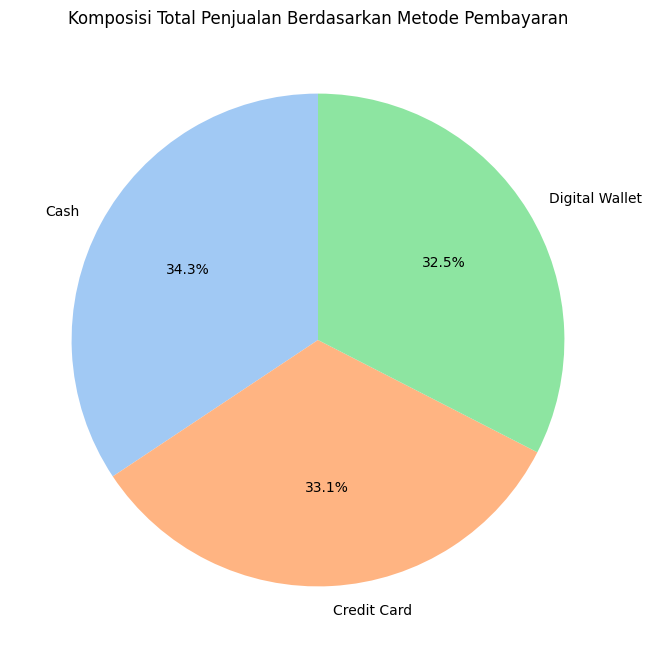

In [44]:
penjualan_per_metode_pembayaran_komposisi = df.groupby('Payment Method')['Order Total'].sum()

plt.figure(figsize=(8, 8))
plt.pie(penjualan_per_metode_pembayaran_komposisi, labels=penjualan_per_metode_pembayaran_komposisi.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Komposisi Total Penjualan Berdasarkan Metode Pembayaran')
plt.ylabel('')
plt.show()

## Distribution/Distribusi

- **Aktivitas**: Menganalisis sebaran nilai dari variabel numerik seperti harga item (Price) dan total pesanan (Order Total).
- **Tujuan**: Memahami pola penyebaran data, mengidentifikasi nilai-nilai yang paling sering muncul, rentang nilai, serta mendeteksi adanya outlier atau anomali pada data harga dan total transaksi.
- **Visualisasi**: Histogram (Grafik Frekuensi) untuk Price dan Order Total.

- Mayoritas item memiliki harga di bawah 7, dengan frekuensi tertinggi berada di kisaran 7, dengan frekuensi tertinggi berada di kisaran 3-5, mengindikasikan bahwa restoran menawarkan banyak pilihan menu dengan harga terjangkau.

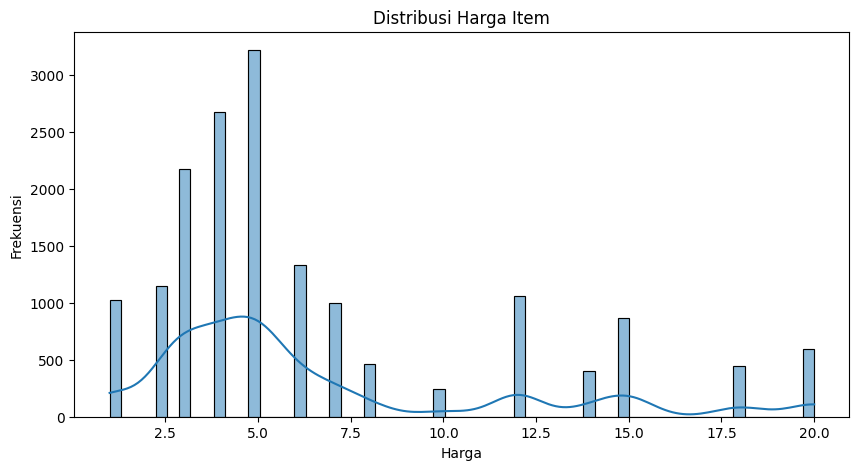

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'].dropna(), kde=True)
plt.title('Distribusi Harga Item')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

- Sebagian besar transaksi memiliki total pesanan di bawah 20, menunjukkan bahwa banyak pelanggan melakukan pembelian dalam jumlah kecil, namun ada beberapa transaksi besar yang mencapai 20, menunjukkan bahwa banyak pelanggan melakukan pembelian dalam jumlah kecil, namun ada beberapa transaksi besar yang mencapai 100.

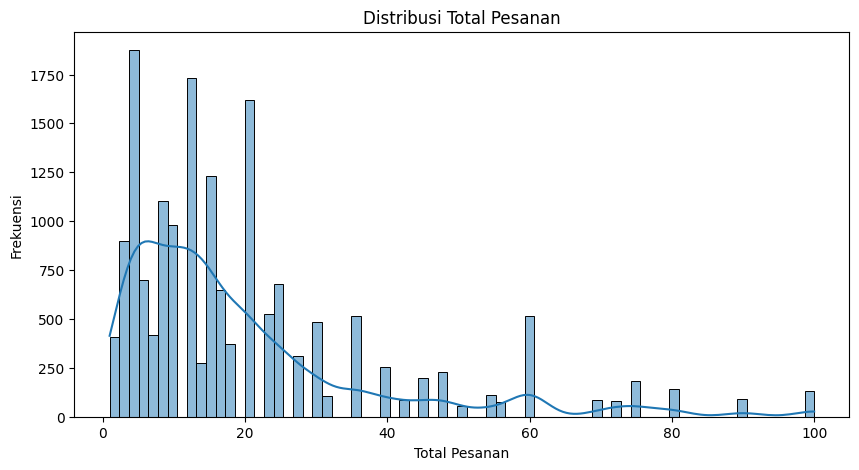

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Order Total'].dropna(), kde=True)
plt.title('Distribusi Total Pesanan')
plt.xlabel('Total Pesanan')
plt.ylabel('Frekuensi')
plt.show()

## Relationship/Hubungan

- **Aktivitas**: Menguji keterkaitan atau korelasi antara variabel-variabel numerik, seperti antara harga, kuantitas, dan total pesanan.
- **Tujuan**: Menemukan apakah ada pengaruh satu variabel terhadap variabel lain, misalnya apakah harga yang lebih tinggi berkorelasi dengan total pesanan yang lebih besar, atau apakah kuantitas yang dibeli mempengaruhi total pesanan.
- **Visualisasi**: Scatter Plot (Diagram Tebar) untuk melihat hubungan antar dua variabel, dan Heatmap (Peta Panas) untuk menampilkan matriks korelasi multi-variabel.

- Matriks korelasi menunjukkan bahwa harga item memiliki pengaruh yang sangat besar terhadap total pesanan (korelasi 0.79), sementara kuantitas memiliki pengaruh yang cukup signifikan (korelasi 0.50), keduanya berkontribusi positif pada nilai total transaksi.

Matriks Korelasi:


,Price,Quantity,Order Total
Price,1.000000,0.007120,0.788138
Quantity,0.007120,1.000000,0.502331
Order Total,0.788138,0.502331,1.000000


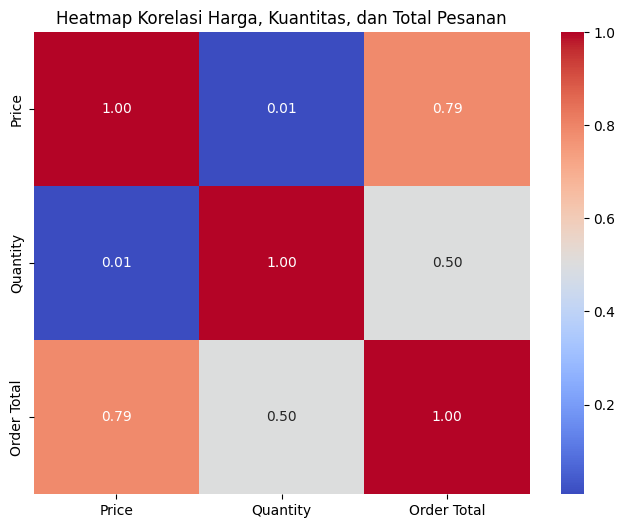

In [60]:
correlation_matrix = df[['Price', 'Quantity', 'Order Total']].corr()
print('Matriks Korelasi:')
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Harga, Kuantitas, dan Total Pesanan')
plt.show()

# Menyimpan Dataset

In [66]:
df.to_csv('[Bersih]Restaurant Sales Data.csv', index=False)